# Water Quality Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
dtypes = {
    "STATION CODE": np.object_
}
na_values=[" ", "NAN"]

In [4]:
data = pd.read_csv("water_dataX.csv.xls", encoding="latin", dtype=dtypes, na_values=na_values)

### Data inspection

In [5]:
data.shape

(1991, 12)

In [6]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STATION CODE                      1869 non-null   object 
 1   LOCATIONS                         1807 non-null   object 
 2   STATE                             1230 non-null   object 
 3   Temp                              1899 non-null   float64
 4   D.O. (mg/l)                       1960 non-null   float64
 5   PH                                1983 non-null   float64
 6   CONDUCTIVITY (µmhos/cm)           1966 non-null   float64
 7   B.O.D. (mg/l)                     1948 non-null   float64
 8   NITRATENAN N+ NITRITENANN (mg/l)  1766 non-null   float64
 9   FECAL COLIFORM (MPN/100ml)        1675 non-null   float64
 10  TOTAL COLIFORM (MPN/100ml)Mean    1859 non-null   float64
 11  year                              1991 non-null   int64  
dtypes: flo

## Description of the dataset

### Number of features

In [8]:
len(data.columns)

12

###  Fetures description

- **STATION CODE**: Unique identifier for each monitoring station.

- **LOCATIONS**: Geographic location of the station.

- **STATE**: State or territory where the station is located.

- **Temp**: Water temperature in degrees Celsius.

- **D.O. (mg/l)**: Dissolved oxygen concentration in milligrams per liter.

- **PH**: Water acidity or alkalinity on a scale of 0 to 14.

- **CONDUCTIVITY (µmhos/cm)**: Ability of water to conduct electric current, measured in micromhos per centimeter.

- **B.O.D. (mg/l)**: Biological oxygen demand, indicating organic matter in the water, measured in milligrams per liter.

- **NITRATENAN N+ NITRITENANN (mg/l)**: Nitrate-nitrogen, Nitrite-nitrogen and Ammonium-nitrogen concentration in milligrams per liter.

- **FECAL COLIFORM (MPN/100ml)**: Presence of fecal coliform bacteria, indicating possible fecal contamination, measured in Most Probable Number per 100 milliliters.

- **TOTAL COLIFORM (MPN/100ml)Mean**: Average Presence of total coliform bacteria, indicating potential water quality issues, measured in Most Probable Number per 100 milliliters.

- **year**: Year in which the data was collected.

### Number of observations by features

In [9]:
data.count()

STATION CODE                        1869
LOCATIONS                           1807
STATE                               1230
Temp                                1899
D.O. (mg/l)                         1960
PH                                  1983
CONDUCTIVITY (µmhos/cm)             1966
B.O.D. (mg/l)                       1948
NITRATENAN N+ NITRITENANN (mg/l)    1766
FECAL COLIFORM (MPN/100ml)          1675
TOTAL COLIFORM (MPN/100ml)Mean      1859
year                                1991
dtype: int64

### Number of missing values (in percent)

In [10]:
(data.isnull().sum() / len(data) * 100).round(2)

STATION CODE                         6.13
LOCATIONS                            9.24
STATE                               38.22
Temp                                 4.62
D.O. (mg/l)                          1.56
PH                                   0.40
CONDUCTIVITY (µmhos/cm)              1.26
B.O.D. (mg/l)                        2.16
NITRATENAN N+ NITRITENANN (mg/l)    11.30
FECAL COLIFORM (MPN/100ml)          15.87
TOTAL COLIFORM (MPN/100ml)Mean       6.63
year                                 0.00
dtype: float64

### Number of unique values per variable

In [11]:
data.nunique()

STATION CODE                         320
LOCATIONS                            665
STATE                                202
Temp                                 177
D.O. (mg/l)                          165
PH                                   265
CONDUCTIVITY (µmhos/cm)             1004
B.O.D. (mg/l)                        406
NITRATENAN N+ NITRITENANN (mg/l)     505
FECAL COLIFORM (MPN/100ml)           868
TOTAL COLIFORM (MPN/100ml)Mean      1093
year                                  12
dtype: int64

### Number of duplicate entries

In [12]:
data.duplicated().sum()

1

### Statistical properties of features

In [13]:
data.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


In [14]:
# renaming colunm for ease
new_column_names = {
    "STATION CODE": "station_code",
    "LOCATIONS": "locations",
    "STATE": "state",
    "Temp": "temp",
    "D.O. (mg/l)": "d.o",
    "PH": "ph",
    "CONDUCTIVITY (µmhos/cm)": "conductivity",
    "B.O.D. (mg/l)": "b.o.d",
    "NITRATENAN N+ NITRITENANN (mg/l)": "nitratenan",
    "FECAL COLIFORM (MPN/100ml)": "f_coliform",
    "TOTAL COLIFORM (MPN/100ml)Mean": "t_coliform"
}

data.rename(new_column_names, axis=1, inplace=True)

In [15]:
data.head()

,station_code,locations,state,temp,d.o,ph,conductivity,b.o.d,nitratenan,f_coliform,t_coliform,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014


In [16]:
# The result of this is lossing over 30% of the entire dataset.
# This is because of the state column having over 38% of missing values
# Further analysis will decide if null values will be dropped or replaced
data.dropna().shape

(879, 12)

## Problem statement 

A comprehensive assessment of water quality will be conducted to evaluate the overall condition of water across different states, with a focus on understanding the trends of water quality over the years and supporting aquatic life.

##  Data Cleaning

### Normalizing the letter case for state

In [17]:
data["state"] = data["state"].str.upper()

###  Checking for outliers and Extreme values

In [18]:
sns.set({"figure.figsize": (15, 7)})

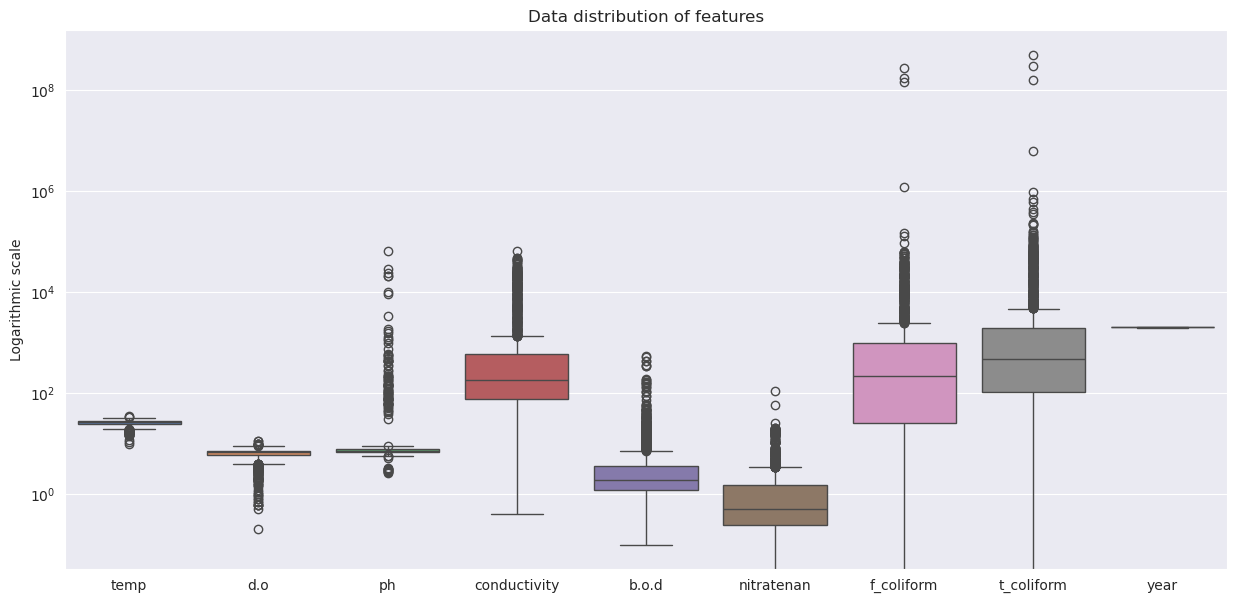

In [19]:
sns.boxplot(data)
ax = plt.gca()

# logarithmic scale is used because of the extreme values found in PH, Conductivity, Fecal chloroform ans Total Chloroform.
ax.set_yscale("log")

plt.title("Data distribution of features")
plt.ylabel("Logarithmic scale");

Comparing the box plot with the [Statistical properties of features](#Statistical-properties-of-features), some of the features contains outliers and some extreme values that will affect the quality of the analysis. Features like PH, conductivity, b.o.d, nitratenan, f_coliform and t_coliform. The maximum and minimum values for these features suggests some form of data entry error.

### Handling Outliers

In [20]:
# filter_masks
percentile90 = data.quantile(0.9, numeric_only=True)
percentile5 = data.quantile(0.05, numeric_only=True)

ph_mask = (data["ph"] > 0) & (data["ph"]  < 14)
conductivity_mask = (data["conductivity"] <= percentile90["conductivity"]) & (data["conductivity"] >= percentile5["conductivity"])
bod_mask = (data["b.o.d"] <= percentile90["b.o.d"]) & (data["b.o.d"] >= percentile5["b.o.d"])
nitrenan_mask = (data["nitratenan"] <= percentile90["nitratenan"]) & (data["nitratenan"] >= percentile5["nitratenan"])
fcoliform_mask = (data["f_coliform"] <= percentile90["f_coliform"]) & (data["f_coliform"] >= percentile5["f_coliform"])
tcoliform_mask = (data["t_coliform"] <= percentile90["t_coliform"]) & (data["t_coliform"] >= percentile5["t_coliform"])

In [21]:
# df = data[(conductivity_mask & ph_mask & bod_mask & nitrenan_mask & fcoliform_mask & tcoliform_mask)]
df = data[(conductivity_mask & ph_mask & bod_mask & fcoliform_mask & tcoliform_mask)]

In [22]:
df.shape

(1116, 12)

###  Handling Missing Values

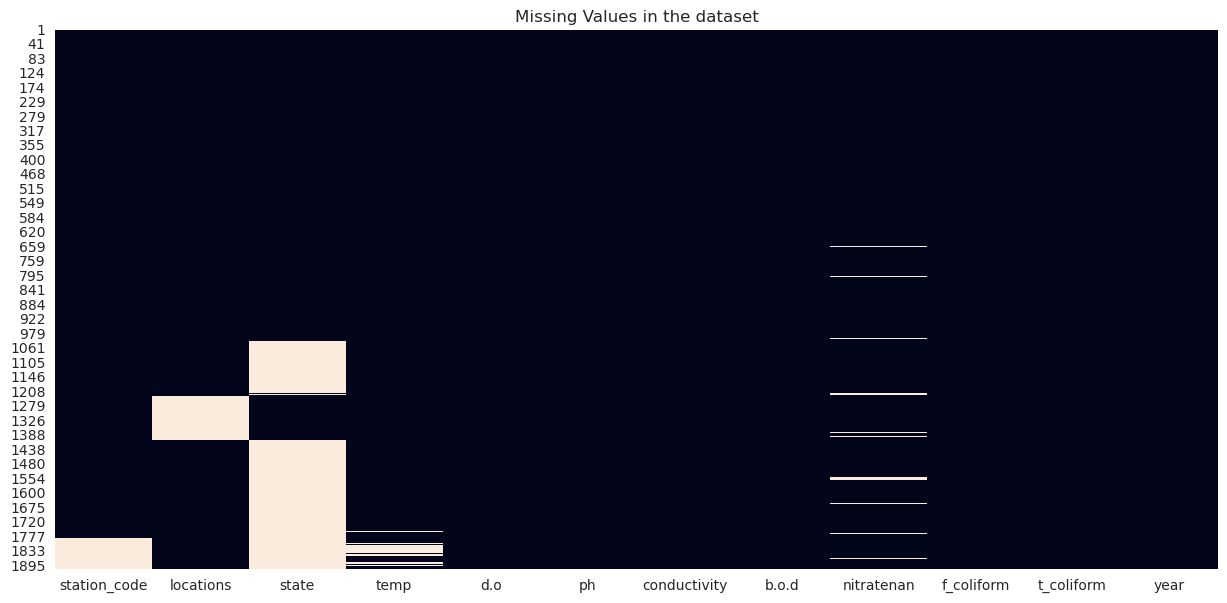

In [23]:
sns.heatmap(df.isna(), cbar=None)
plt.title("Missing Values in the dataset");

The majority of missing values from the dataset can be seen in the `state` feature. Other features like `station_code`, `locations`, `temp` and `nitratenan` also contain missing values.

### Replacing missing states using their locations

In [24]:
# This script is used to replace missing states values
# by using the state values present from previous entries
# of the same location 

for entry in df[df["state"].isna() | df["locations"].isna()].index:
    location = df.loc[entry]["locations"]
    states = df[df["locations"] == location]

    if len(states) > 1:
        df.loc[entry, "state"] = states.iloc[0]["state"]

###  Replacing missing station code using their states and locations

In [25]:
# This script is used to replace missing station_code values
# by using the station_code values present from previous entries
# of the same location and state

for entry in df[df["station_code"].isna()].index:
    tmp = df.loc[entry]
    loc_tmp = df[(df["state"] == tmp["state"]) & (df["locations"] == tmp["locations"])]
    if len(loc_tmp) > 1:
        df.loc[entry, "station_code"] = loc_tmp.iloc[0]["station_code"]

```py
# Intended script to fill missing locations
for entry in df[df["locations"].isna()].index:
    tmp = df.loc[entry]
    loc_tmp = df[df["station_code"] == tmp["station_code"]]
    if len(loc_tmp) > 1:
        df.loc[entry, "locations"] = loc_tmp.iloc[0]["locations"]
```

Locations could not be filled in the same manner as state and station code because the locations locations with empty values does not have similar entries with the same station code and state.

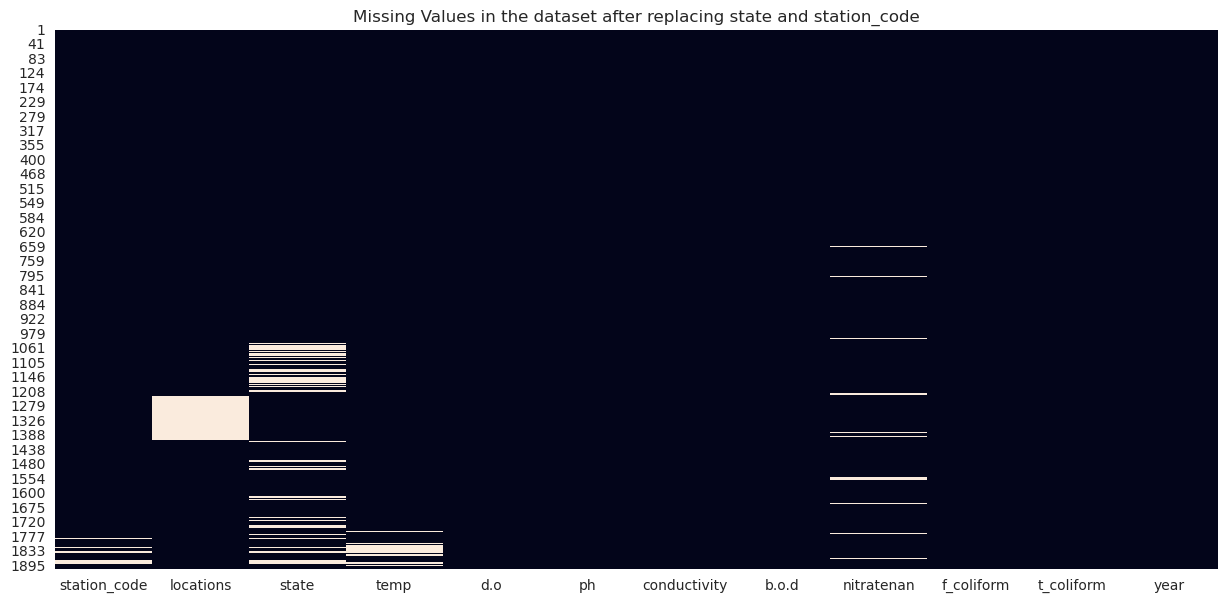

In [26]:
sns.heatmap(df.isna(), cbar=None)
plt.title("Missing Values in the dataset after replacing state and station_code");

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(887, 12)

###  Handling duplicate values

In [29]:
df.duplicated().sum()

0

No duplicate values found in the dataset after previous data cleaning processes have been carried out.

## Exploratory Data Analysis (EDA)

A comprehensive assessment of water quality will be conducted to evaluate the overall condition of water across the different states, with a focus on understanding the water quality trends over the years.

In [30]:
column_names = {
    'station_code': 'STATION CODE',
    'locations': 'LOCATIONS',
    'state': 'STATE',
    'temp': 'Temp',
    'd.o': 'D.O. (mg/l)',
    'ph': 'PH',
    'conductivity': 'CONDUCTIVITY (µmhos/cm)',
    'b.o.d': 'B.O.D. (mg/l)',
    'nitratenan': 'NITRATENAN N+ NITRITENANN (mg/l)',
    'f_coliform': 'FECAL COLIFORM (MPN/100ml)',
    't_coliform': 'TOTAL COLIFORM (MPN/100ml)Mean'
}

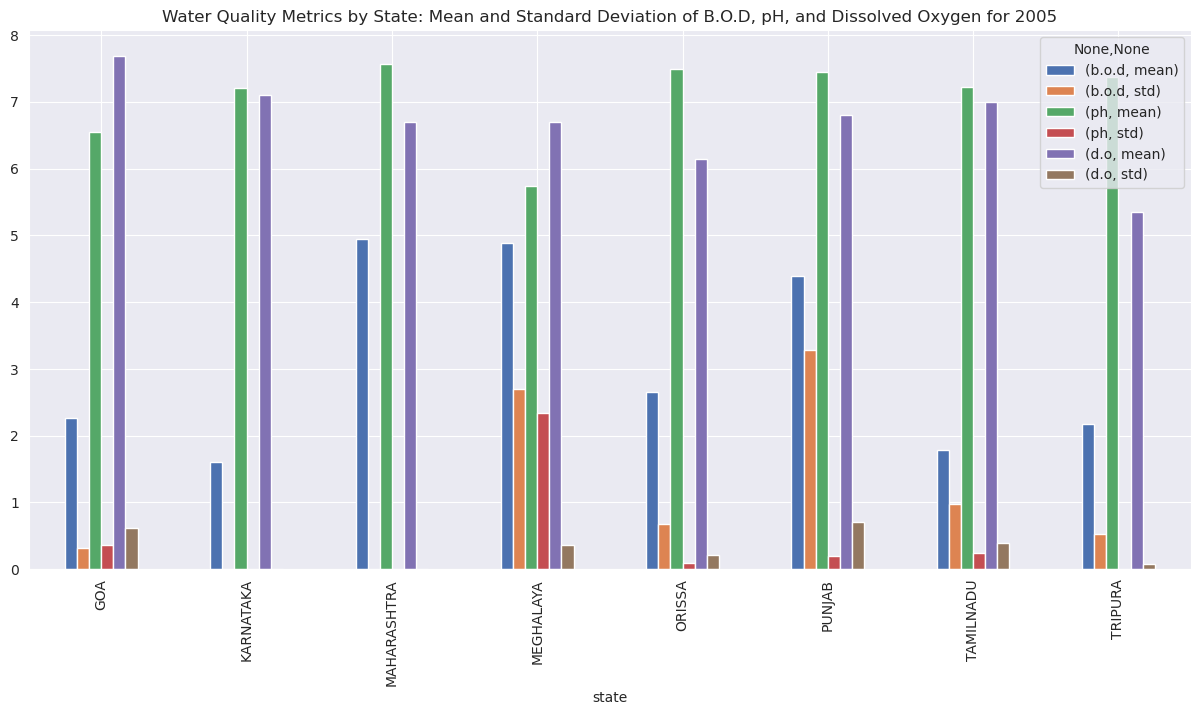

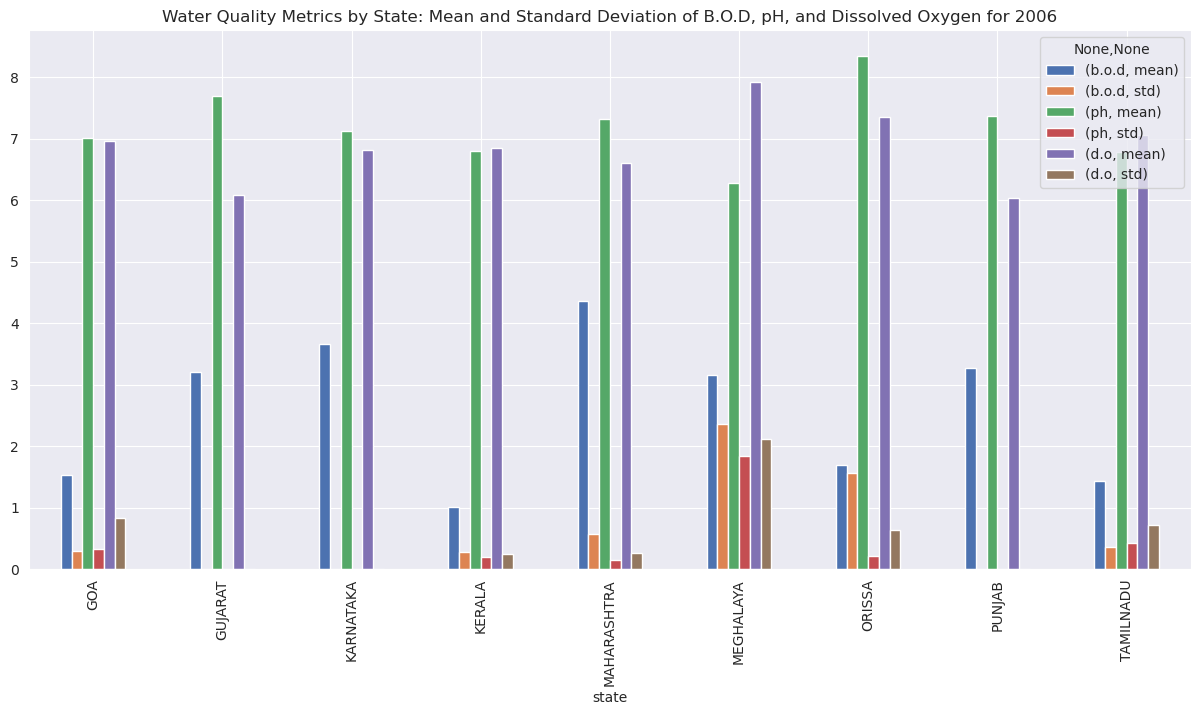

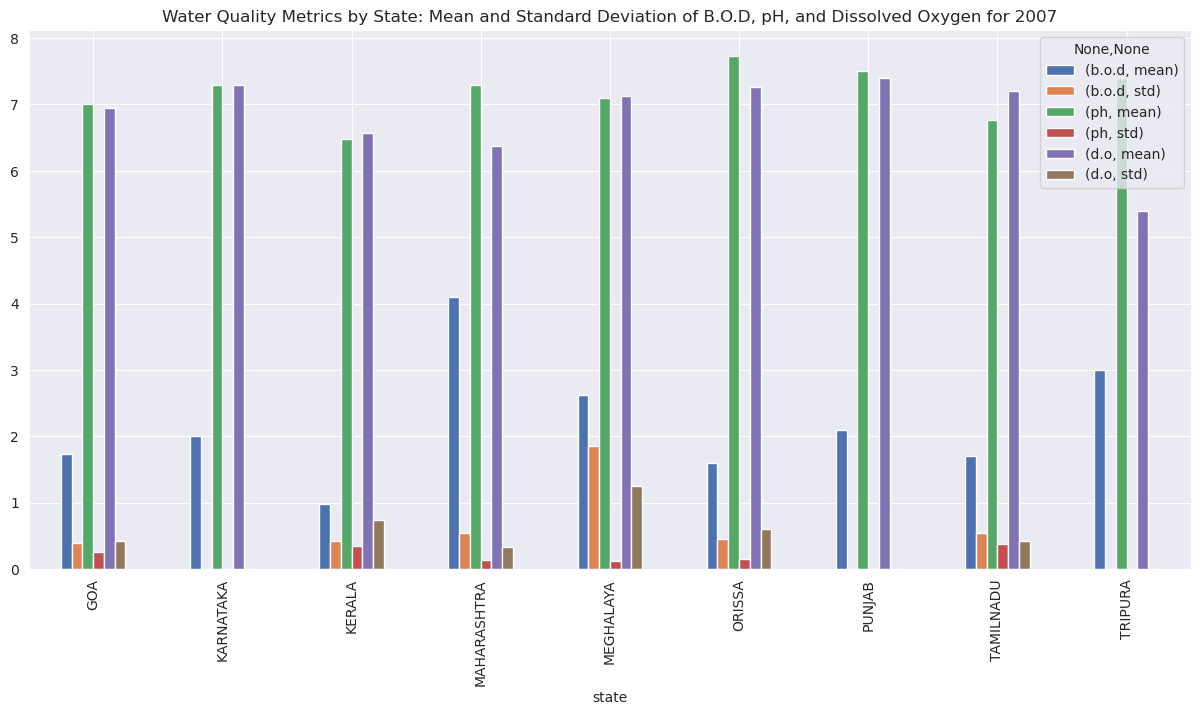

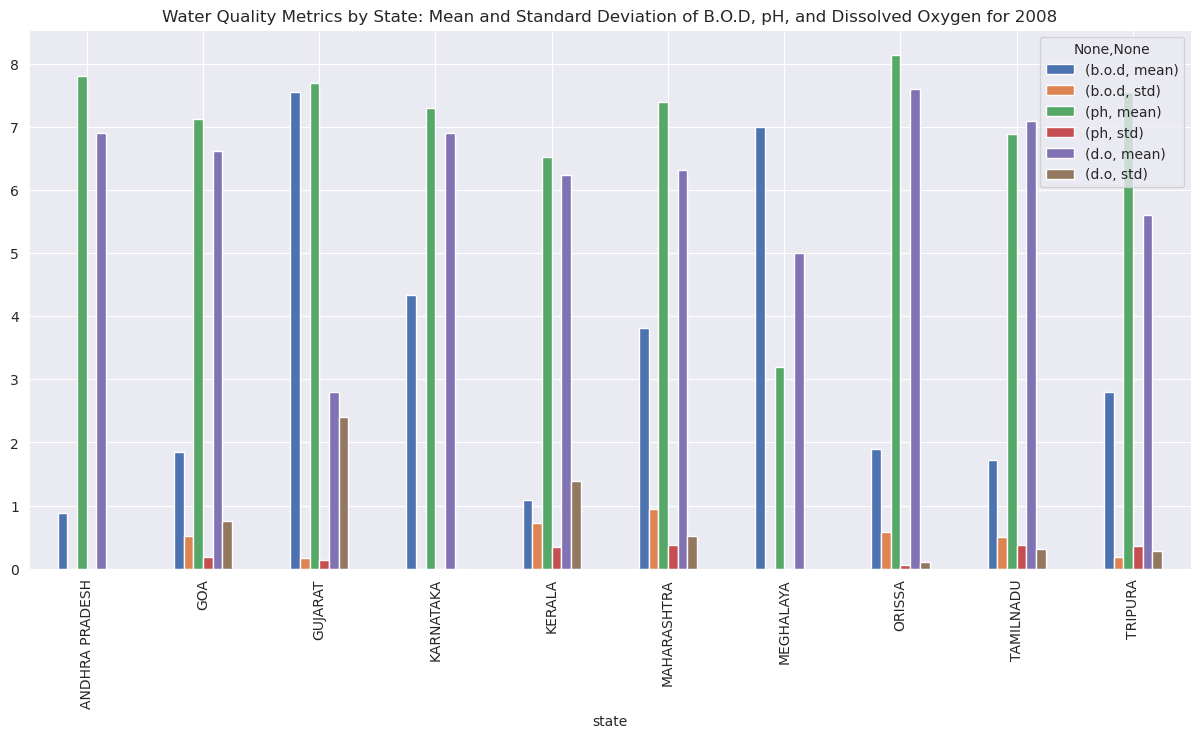

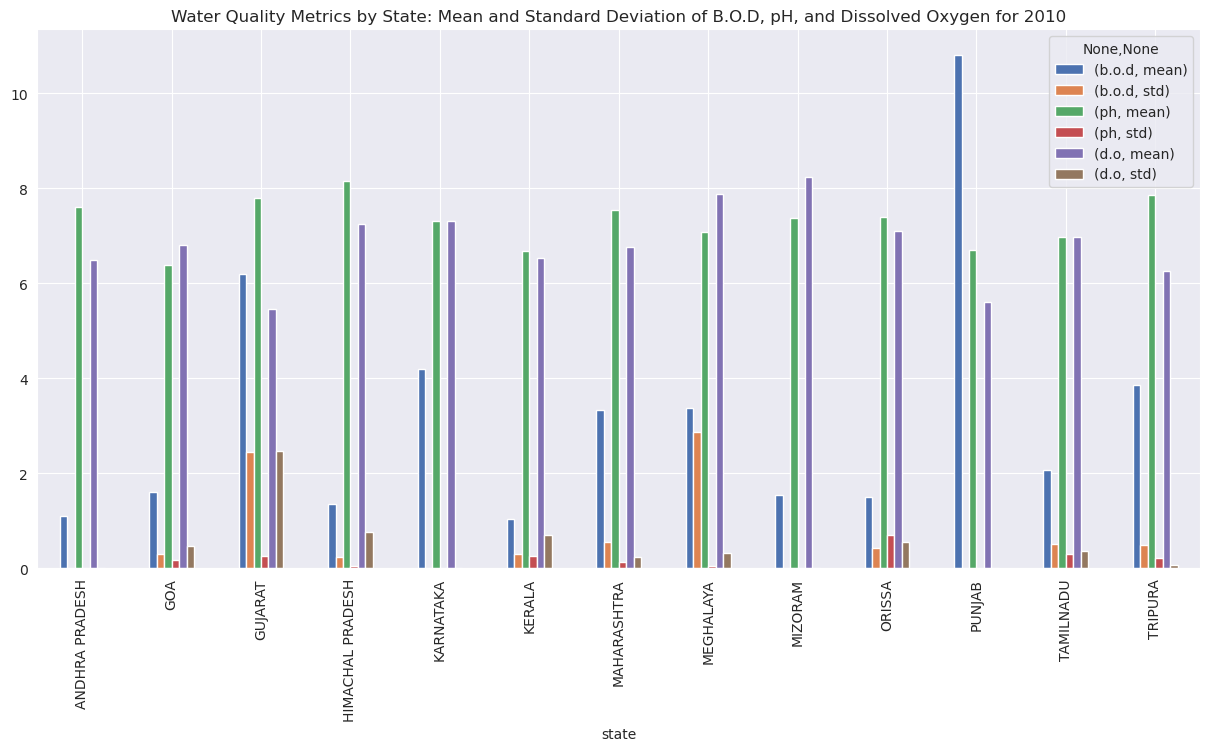

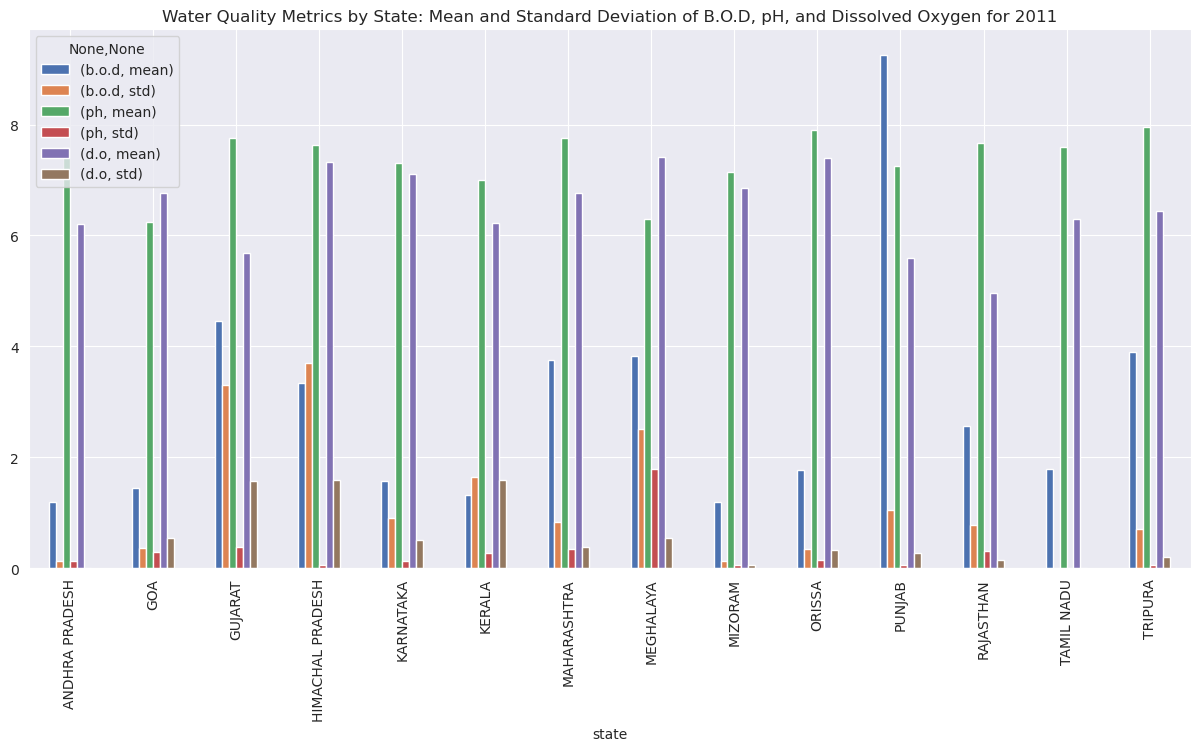

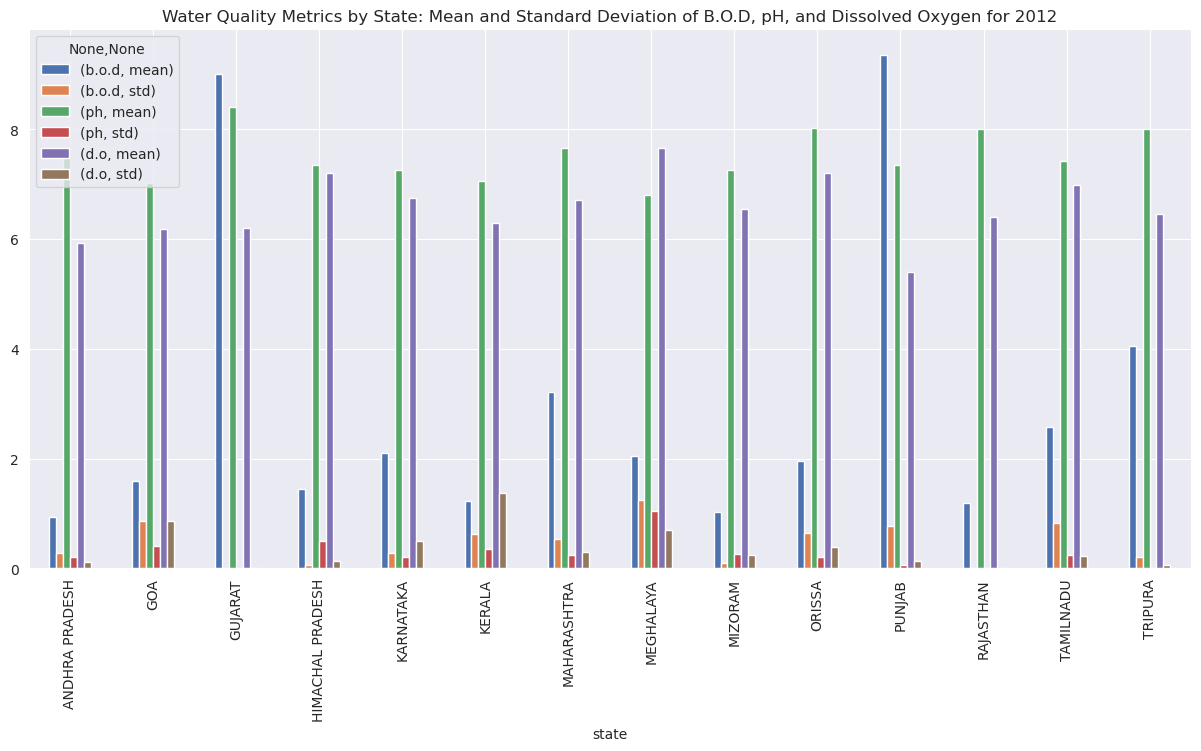

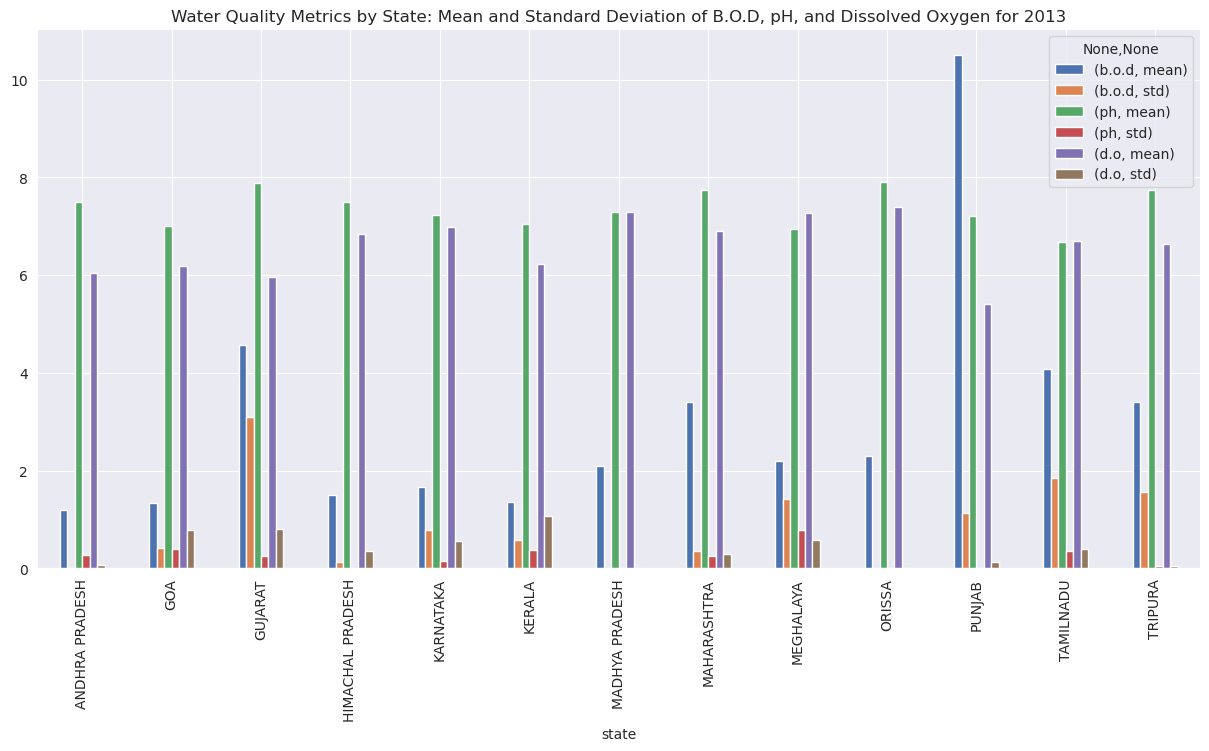

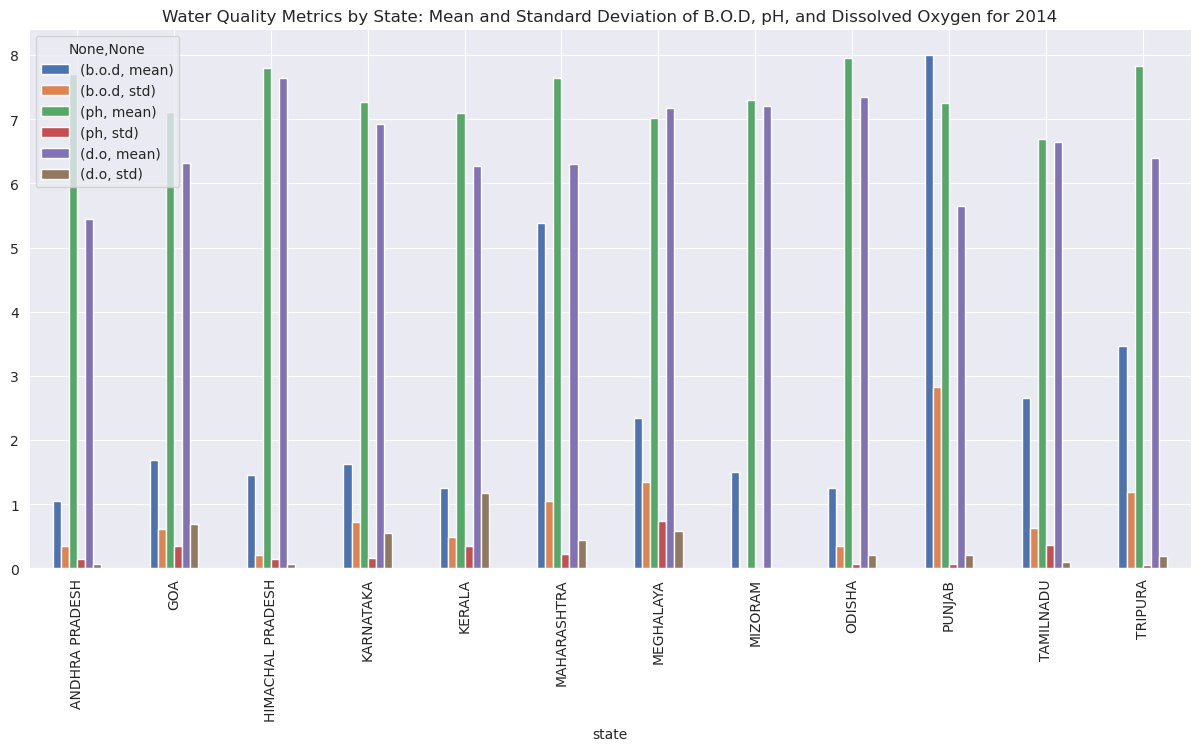

In [31]:
for year in df["year"].unique()[::-1]:
    df[df["year"] == year].groupby("state").agg({
        "b.o.d": ["mean", "std"],
        "ph": ["mean", "std"],
        "d.o": ["mean", "std"],
    }).plot(kind="bar", title=f"Water Quality Metrics by State: Mean and Standard Deviation of B.O.D, pH, and Dissolved Oxygen for {year}");
    plt.savefig(f"./images/water_quality_{year}.png")

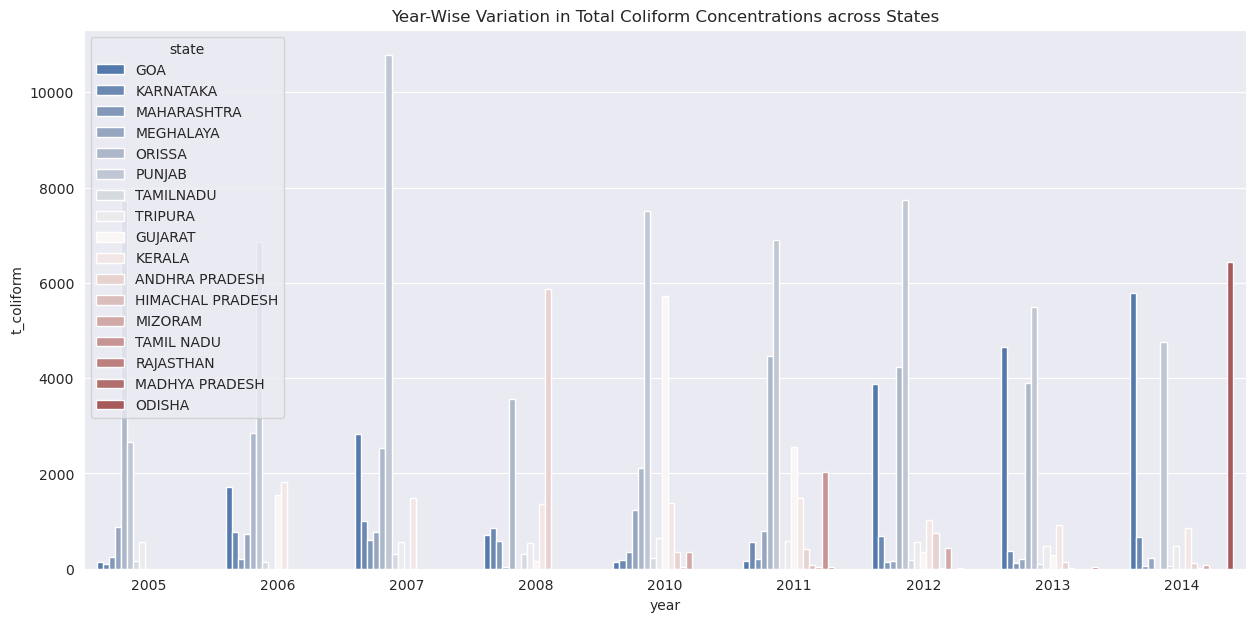

In [32]:
sns.barplot(df, x="year", y="t_coliform", hue="state", errorbar=None, palette="vlag")
plt.title("Year-Wise Variation in Total Coliform Concentrations across States");
plt.savefig("./images/yearwise_tcoliform_by_states.png")

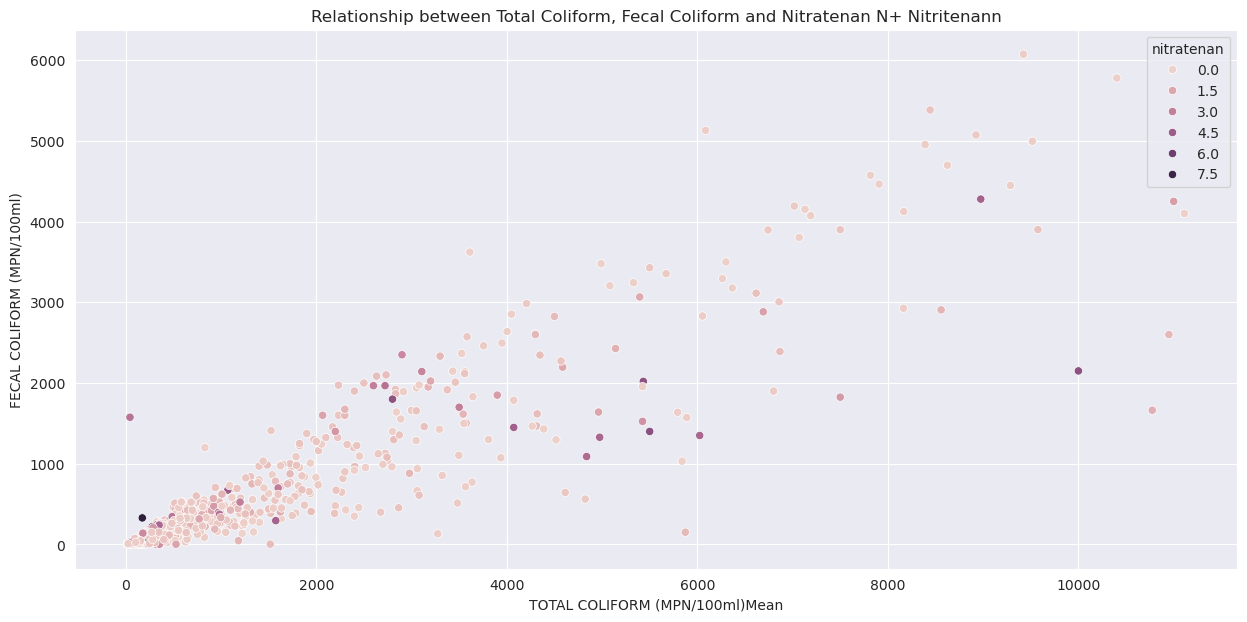

In [33]:
sns.scatterplot(x="t_coliform", y="f_coliform", hue="nitratenan", data=df)
plt.title("Relationship between Total Coliform, Fecal Coliform and Nitratenan N+ Nitritenann")
# plt.legend(loc="upper left")
plt.xlabel(column_names["t_coliform"])
plt.ylabel(column_names["f_coliform"]);
plt.savefig("./images/relationship_between_coliform_nitratenan.png")

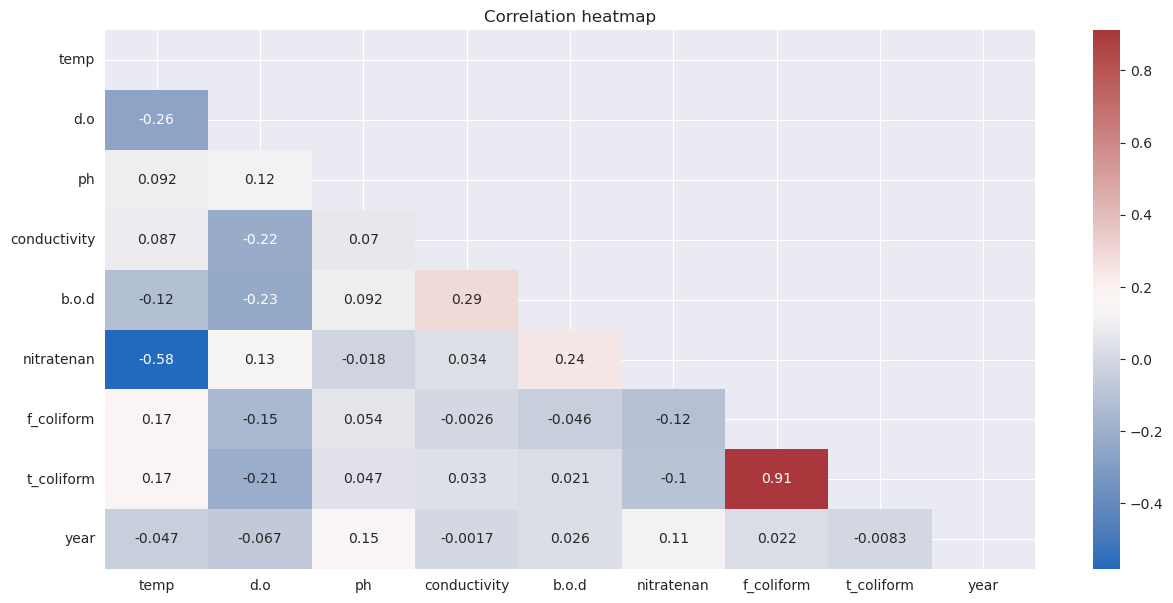

In [34]:
corr_mask = np.triu(df.select_dtypes("number").corr())
ax = sns.heatmap(df.select_dtypes("number").corr(), annot=True, mask=corr_mask, cmap="vlag")

plt.title("Correlation heatmap");
plt.savefig("./images/correlation_heatmap.png")

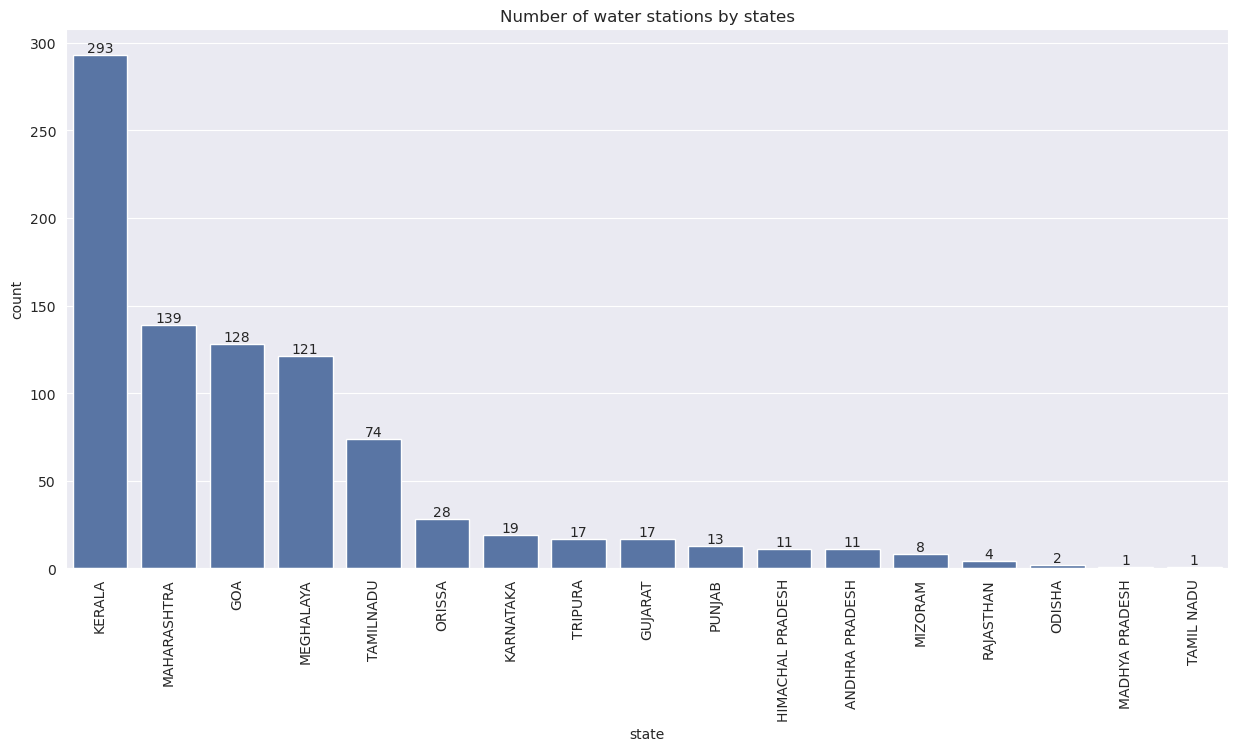

In [35]:
ax = sns.countplot(x="state", data=df, order=df["state"].value_counts().index)
plt.title("Number of water stations by states")
plt.xticks(rotation=90)

ax.bar_label(ax.containers[0]);

plt.savefig("./images/stations_by_state.png")

In [36]:
# this is a filter containing the top five states by number of stattions
# this is done to better understand the water bodies in those states
top_five_states = df[(df["state"] == "KERALA") | (df["state"] == "MAHARASHTRA") | (df["state"] == "GOA") | (df["state"] == "MEGHALAYA") | (df["state"] == "TAMILNADU")]

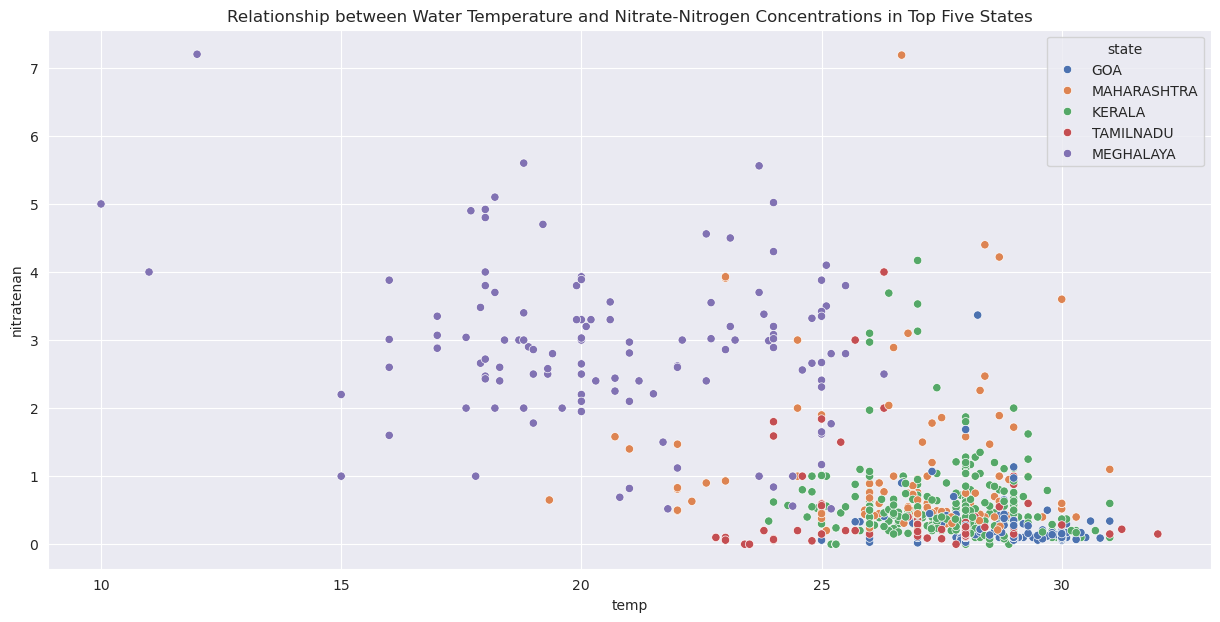

In [37]:
sns.scatterplot(x="temp", y="nitratenan", hue="state", data=top_five_states)
plt.title("Relationship between Water Temperature and Nitrate-Nitrogen Concentrations in Top Five States");

plt.savefig("./images/temp_nitrate_relationship_five_states.png")

## Data Selection for model building

### Function for data cleaning

In [38]:
def wrangle(dfframe: pd.DataFrame) -> pd.DataFrame:
    """function for cleaning the dataset for model building"""

    # remove high cardinality columns
    df = dfframe.drop(columns=["station_code", "state", "locations"])


    # Handling extreme values using the 5th percentile to 90th percentile
    percentile90 = df.quantile(0.9, numeric_only=True)
    percentile5 = df.quantile(0.05, numeric_only=True)
    
    ph_mask = (df["ph"] > 0) & (df["ph"]  < 14)
    conductivity_mask = (df["conductivity"] <= percentile90["conductivity"]) & (df["conductivity"] >= percentile5["conductivity"])
    bod_mask = (df["b.o.d"] <= percentile90["b.o.d"]) & (df["b.o.d"] >= percentile5["b.o.d"])
    nitrenan_mask = (df["nitratenan"] <= percentile90["nitratenan"]) & (df["nitratenan"] >= percentile5["nitratenan"])
    fcoliform_mask = (df["f_coliform"] <= percentile90["f_coliform"]) & (df["f_coliform"] >= percentile5["f_coliform"])
    tcoliform_mask = (df["t_coliform"] <= percentile90["t_coliform"]) & (df["t_coliform"] >= percentile5["t_coliform"])

    df = df[(conductivity_mask & ph_mask & bod_mask & nitrenan_mask & fcoliform_mask & tcoliform_mask)]

    # dropping null values from the dataset
    df.dropna(inplace=True)

    return df

In [39]:
wrangle(data)

,temp,d.o,ph,conductivity,b.o.d,nitratenan,f_coliform,t_coliform,year
1,29.8,5.7,7.20,189.0,2.000,0.200,4953.0,8391.0,2014
2,29.5,6.3,6.90,179.0,1.700,0.100,3243.0,5330.0,2014
3,29.7,5.8,6.90,64.0,3.800,0.500,5382.0,8443.0,2014
4,29.5,5.8,7.30,83.0,1.900,0.400,3428.0,5500.0,2014
5,30.0,5.5,7.40,81.0,1.500,0.100,2853.0,4049.0,2014
...,...,...,...,...,...,...,...,...,...
1894,28.0,7.1,6.94,95.8,0.943,0.151,10.0,26.0,2005
1895,27.0,7.4,7.00,88.5,0.977,0.186,27.0,105.0,2005
1897,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0,2005
1899,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0,2005


### Handling high cardinality features

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_code  1869 non-null   object 
 1   locations     1807 non-null   object 
 2   state         1230 non-null   object 
 3   temp          1899 non-null   float64
 4   d.o           1960 non-null   float64
 5   ph            1983 non-null   float64
 6   conductivity  1966 non-null   float64
 7   b.o.d         1948 non-null   float64
 8   nitratenan    1766 non-null   float64
 9   f_coliform    1675 non-null   float64
 10  t_coliform    1859 non-null   float64
 11  year          1991 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 186.8+ KB


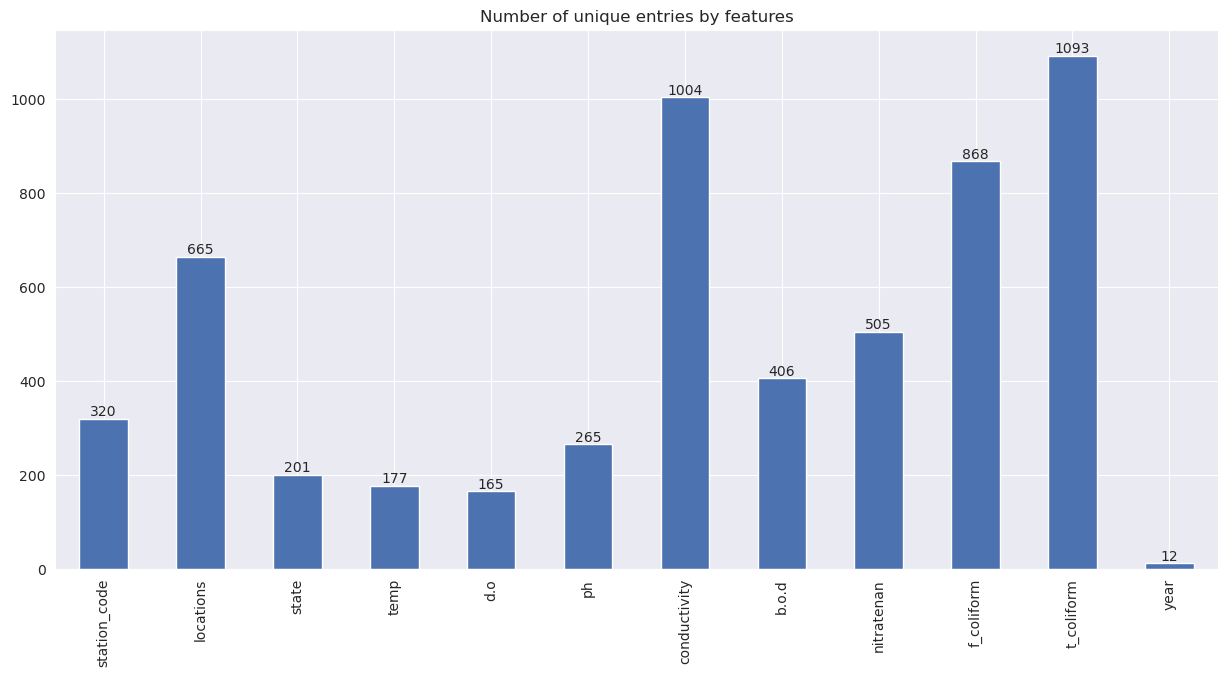

In [41]:
ax = data.nunique().plot(kind="bar", title="Number of unique entries by features")
ax.bar_label(ax.containers[0]);

plt.savefig("./images/unique_entries_by_features.png")

Although there may be specific conditions in certain locations and states that affects the quality of water, the states and locations does not inherently give us the information we would be needing when building a model. In this case, they possess a high amount of unique values, which will increase the dimensionality of the data during model building. Hence the categorical columns such as `station_code`, `locations` and `state` will be dropped.

### Handling Extreme values

In [42]:
data.select_dtypes("number").describe()

,temp,d.o,ph,conductivity,b.o.d,nitratenan,f_coliform,t_coliform,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


From the table above, it can be seen that there are several outliers for various features, having their maximum values much larger than their 75 percentile.

- PH values range from 0 to 14, but the maximum from the table is 67115.
- B.O.D, Nitratenan, Conductivity, Fecal coliform and Total coliform also shows a lot of difference between the maximum value and the 75 percentile.

In [43]:
# df = data[(conductivity_mask & ph_mask & bod_mask & nitrenan_mask & fcoliform_mask & tcoliform_mask)]
data = data.select_dtypes("number")[(conductivity_mask & ph_mask & bod_mask & nitrenan_mask & fcoliform_mask & tcoliform_mask)]
data.shape

(1006, 9)

### Handling missing data

In [44]:
data.isna().sum()

temp            32
d.o              0
ph               0
conductivity     0
b.o.d            0
nitratenan       0
f_coliform       0
t_coliform       0
year             0
dtype: int64

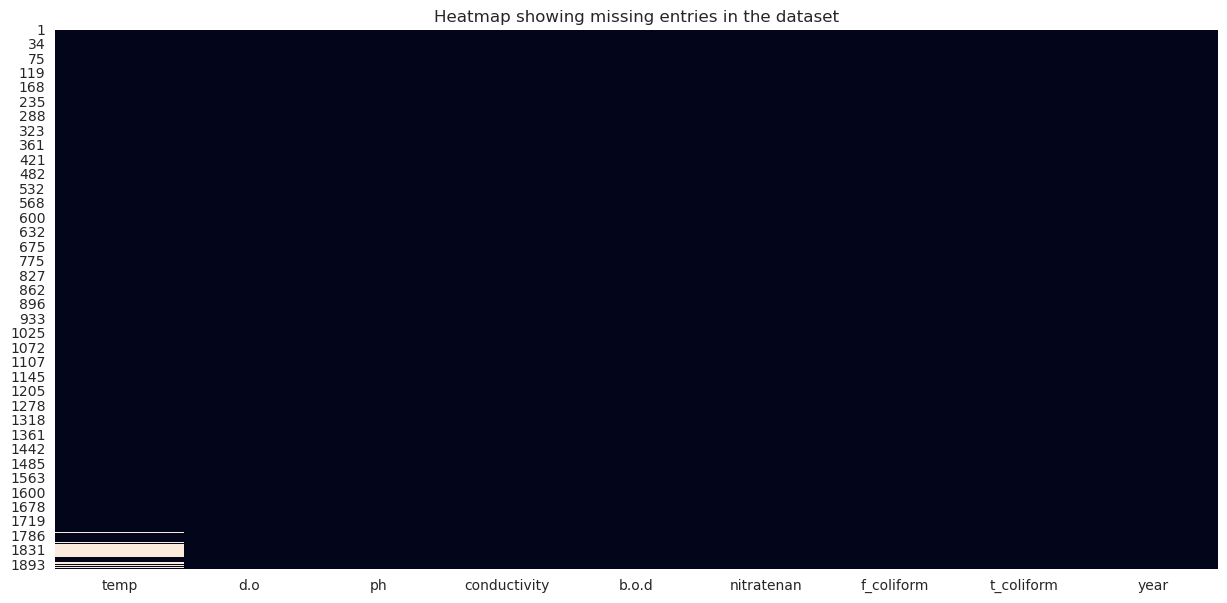

In [45]:
sns.heatmap(data=data.isna(), cbar=None)
plt.title("Heatmap showing missing entries in the dataset");

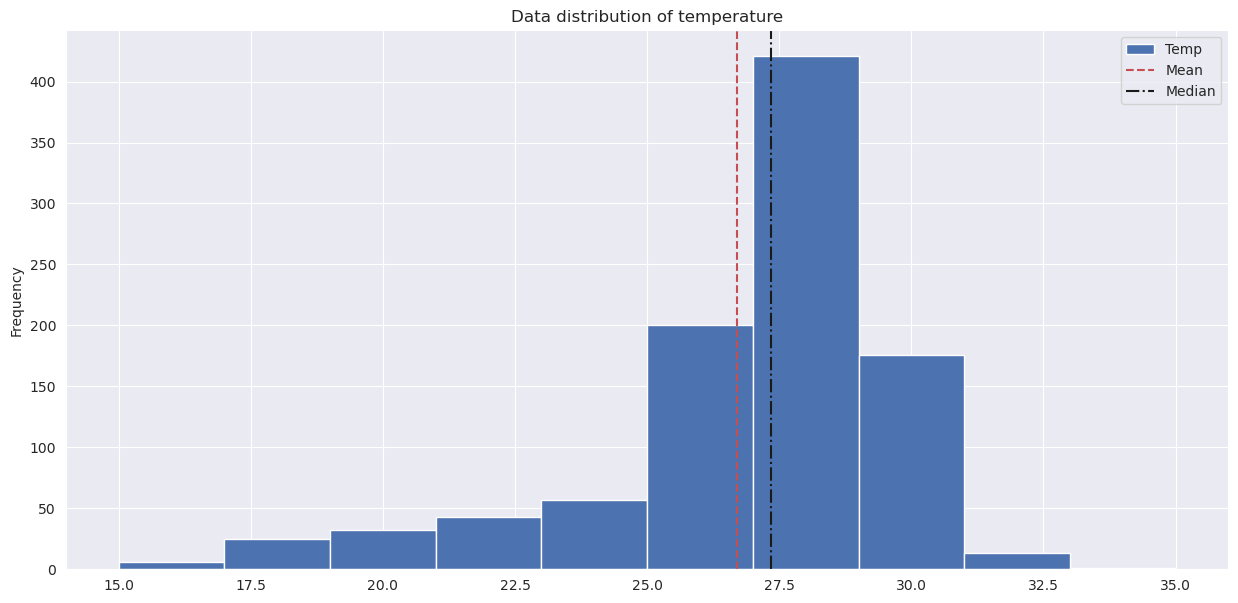

In [46]:
ax = data["temp"].plot(kind="hist")
plt.axvline(data.temp.mean(), linestyle="--", color="r")
plt.axvline(data.temp.median(), linestyle="-.", color="k")
# ax.set_yscale("log")

plt.title("Data distribution of temperature")
plt.legend(["Temp", "Mean", "Median"]);

plt.savefig("./images/temp_data_distribution.png")

The temperature feature does not exhibit normal distribution, therefore, filling the missing values with the mean is not a good option. Also, the outliers will affect the mean value, affecting the data the model is trained on. The Median temperature is the best option for filling the empty values because the data is skewed. The median values will be used since the data is left-skewed.

In [47]:
data.fillna(value=data.temp.median(), inplace=True)

In [48]:
data.isna().sum()

temp            0
d.o             0
ph              0
conductivity    0
b.o.d           0
nitratenan      0
f_coliform      0
t_coliform      0
year            0
dtype: int64

## Model Building

...